# Day 1


## Warm up

/Users/danramirez/MBS


([<matplotlib.axis.YTick at 0x167df7390>,
 [Text(0, 0, 'Andorra'),
  Text(0, 1, 'Austria'),
  Text(0, 2, 'Belgium'),
  Text(0, 3, 'Denmark'),
  Text(0, 4, 'Finland'),
  Text(0, 5, 'France'),
  Text(0, 6, 'Germany'),
  Text(0, 7, 'Italy'),
  Text(0, 8, 'Ireland'),
  Text(0, 9, 'Greece')])

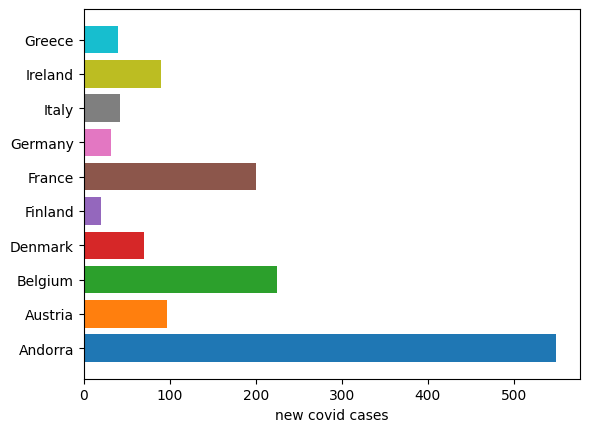

In [7]:
import matplotlib.pyplot as plt
import os
import sys
import pandas as pd
import numpy as np
import openpyxl

# Paths and directory
current_directory = os.getcwd()
print(current_directory)

file = os.path.join(current_directory, "01-data/covid02", "covid.xlsx")
df = pd.read_excel(file,index_col='date')

x=np.arange(0,df.loc['2020-10-01'].shape[0])
y=df.loc['2020-10-01',:].values
colormap=plt.cm.tab10(x)
plt.barh(x,y,align='center',color=colormap)
plt.xlabel('new covid cases')
plt.yticks(x,df.columns)
#plt.xticks(x,df.columns,rotation=90)



# Trading Signal coding

## Part 1— testing out Yahoo Finance package

In [1]:
import yfinance as yf
import datetime

# Define the ticker symbol
tickerSymbol = 'AAPL'
yrs= 1

# Get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

end_date = datetime.date.today()  # Today's date
start_date = end_date - datetime.timedelta(days=yrs*365) 

# Get the historical prices for this ticker
df = tickerData.history(period='1d', start=start_date, end=end_date) 

print(df)


                                 Open        High         Low       Close  \
Date                                                                        
2023-02-14 00:00:00-05:00  151.312344  152.953593  150.059039  152.386612   
2023-02-15 00:00:00-05:00  152.297080  154.674390  152.068306  154.505295   
2023-02-16 00:00:00-05:00  152.694940  155.499975  152.535801  152.893890   
2023-02-17 00:00:00-05:00  151.541131  152.187674  150.049095  151.740067   
2023-02-21 00:00:00-05:00  149.402535  150.496701  147.622045  147.691666   
...                               ...         ...         ...         ...   
2024-02-07 00:00:00-05:00  190.397053  190.806534  188.369641  189.168625   
2024-02-08 00:00:00-05:00  189.148646  189.298448  187.111252  188.080017   
2024-02-09 00:00:00-05:00  188.649994  189.990005  188.000000  188.850006   
2024-02-12 00:00:00-05:00  188.419998  188.669998  186.789993  187.149994   
2024-02-13 00:00:00-05:00  185.770004  186.210007  183.509995  185.039993   

## Part 2— Buying & Selling Singals Function

In [2]:
import matplotlib.pyplot as plt
import os
import sys
import pandas as pd
import numpy as np
import openpyxl
import warnings
warnings.filterwarnings('ignore')

#setting long and short paramaters----------------------------------------
short, long= 5 ,20

# Paths and directory-----------------------------------------------------
current_directory = os.getcwd()
print(current_directory)

df['close_short']=df['Close'].rolling(window=short).mean()
df['close_long']=df['Close'].rolling(window=long).mean()
df.index = pd.to_datetime(df.index)
df.index = df.index.strftime('%Y-%m-%d')

x5=df['close_short']
x20=df['close_long']
close=df['Close']

# Buy/Sell function-------------------------------------------------------
def buysellfx(df):
    status = 0
    pricebuy = []
    pricesell = []
    profit = []
    transdays = []
    temp_buyprice = []
    temp_buyindex = []

    for i in range(len(df) - 1):
        #buy logic
        if df['close_short'][i] > df['close_long'][i]:
            if status != 1:
                status = 1
                pricebuy.append(df['Open'][i + 1])
                pricesell.append(np.nan)
                profit.append(np.nan)
                transdays.append(np.nan)
                temp_buyprice.append(df['Open'][i + 1])
                temp_buyindex.append(i + 1)
            else:
                pricebuy.append(np.nan)
                pricesell.append(np.nan)
                profit.append(np.nan)
                transdays.append(np.nan)
        
        #sell logic
        elif df['close_short'][i] < df['close_long'][i]:
            if status != 0:
                status = 0
                pricebuy.append(np.nan)
                pricesell.append(df['Open'][i + 1])
                profit.append(df['Open'][i + 1] - temp_buyprice[-1])
                transdays.append(i + 1 - temp_buyindex[-1])
            else:
                pricebuy.append(np.nan)
                pricesell.append(np.nan)
                profit.append(np.nan)
                transdays.append(np.nan)
        else:
            pricebuy.append(np.nan)
            pricesell.append(np.nan)
            profit.append(np.nan)
            transdays.append(np.nan)

    pricebuy.append(np.nan)
    pricesell.append(np.nan)
    profit.append(np.nan)
    transdays.append(np.nan)

    return pricebuy, pricesell, profit, transdays

# Adding new columns------------------------------------------------------
df['pricebuy'], df['pricesell'], df['profit'], df['transdays'] = buysellfx(df)
# ------------------------------------------------------------------------


/Users/danramirez/MBS


## Part 3— Charting Singals

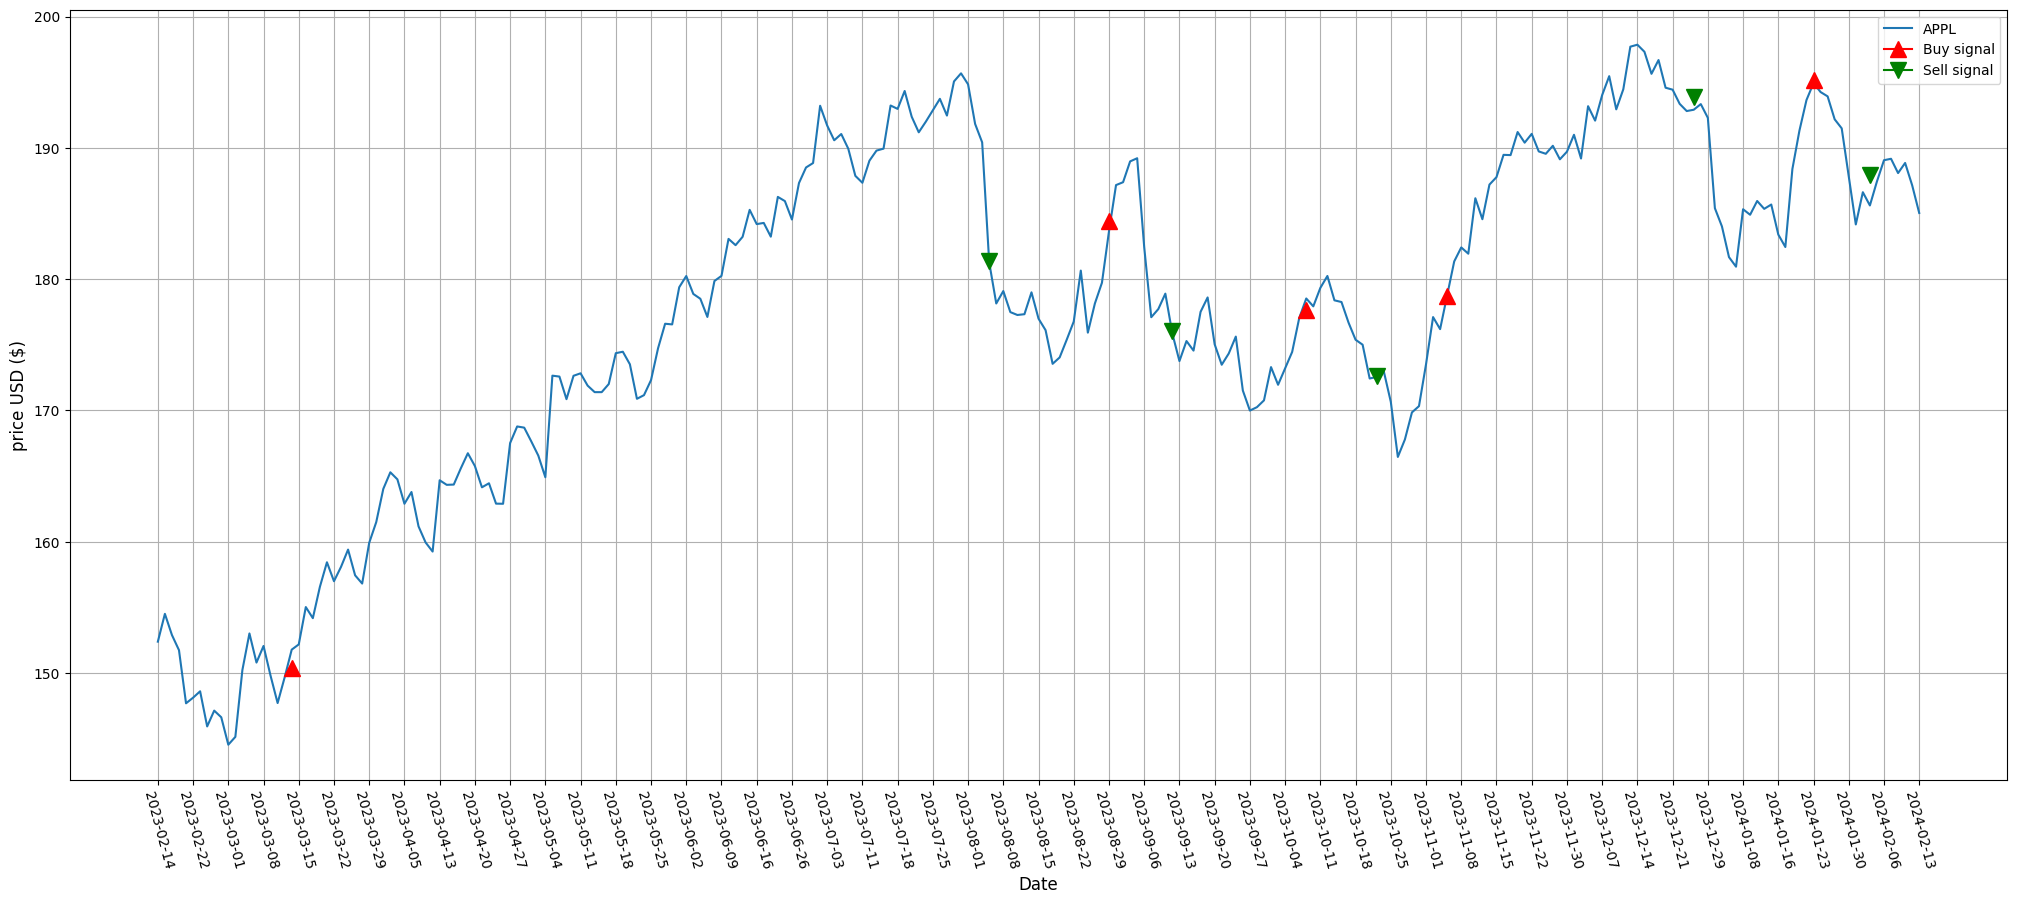

In [3]:
#charting data ------------------------------------------------------------
plt.figure(figsize=(25, 10))
plt.plot(close, label='APPL')
#plt.plot(x5, label='Close short')
#plt.plot(x20, label='Close long')

plt.plot(df.index,df['pricebuy'].values,color='red',label='Buy signal',marker='^',markersize=12)
plt.plot(df.index,df['pricesell'].values,color='green',label='Sell signal',marker='v',markersize=12)

n = 5  # Adjust n as per your data
plt.xticks(ticks=df.index[::n], labels=df.index[::n])
plt.xticks(rotation=-75)

plt.legend()
plt.xlabel('Date',fontsize=12)
plt.ylabel('price USD ($)',fontsize=12)
plt.grid()

## Part 4— Export results to Excel

In [4]:
#export to excel-------------------------------------------------------------
df.to_excel(current_directory+'/02-output/stock.xlsx', index=True)

# Day 2

## marketing data

In [ ]:
import matplotlib.pyplot as plt
import os
import sys
import pandas as pd
import numpy as np
import openpyxl
import pandas as pd
import statsmodels.api as sm
import numpy as np  # Importing numpy
from sklearn.model_selection import train_test_split


# Paths and directory
current_directory = os.getcwd()
print(current_directory)

file = os.path.join(current_directory, "01-data/marketingdata", "Marketing.xlsx")
df = pd.read_excel(file)

print(df.info)

Y = df['Sales']
X_cols = ['TV','FB','Flyer']  # List of column names for predictor variables

# Extract columns from df to create X DataFrame
X = df[X_cols]

# Adding a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(Y, X).fit()

# Get model summary
print(model.summary())

'''
Income	Limit	Rating	Cards	Age	Education	Gender	Student	Married

'''



## Credit data

In [ ]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Paths and directory
current_directory = os.getcwd()
print(current_directory)

file = os.path.join(current_directory, "01-data/credit", "credit.xlsx")
df = pd.read_excel(file)

print(df.info())

# Handle categorical variables using one-hot encoding
categorical_cols = ['Gender', 'Student', 'Married','Education']  # Assuming these are categorical
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
print(df.info())

# Split data into predictors and target
Y = df['Balance']
X_cols = ['Income', 'Limit', 'Rating', 'Cards', 'Age', ]  # Exclude categorical columns
X = df[X_cols]

# Adding a constant to the model (intercept)
X = sm.add_constant(X)

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Fit the model
model = sm.OLS(Y_train, X_train).fit()

# Get model summary
print(model.summary())


In [1]:
import pandas as pd
import itertools
import statsmodels.api as sm

# Load data
file = "01-data/credit/credit.xlsx"
df = pd.read_excel(file)

# Handle categorical variables using one-hot encoding
categorical_cols = ['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Define predictor variables (excluding target variable)
all_X_cols = df.drop(columns=['Balance']).columns
Y = df['Balance']

# Generate all combinations of predictor variables
all_combinations = []
for r in range(1, len(all_X_cols) + 1):
    combinations_r = list(itertools.combinations(all_X_cols, r))
    all_combinations.extend(combinations_r)

# Fit models for each combination of predictor variables
models = {}
for i, combo in enumerate(all_combinations):
    X = df[list(combo)]  # Select predictor variables for this combination
    X = sm.add_constant(X)  # Add constant (intercept) to the model

    # Fit the model
    model = sm.OLS(Y, X).fit()
    
    # Store the model and its summary
    models[combo] = model.summary()

# Now you have a dictionary 'models' containing the model summary for each combination of predictor variables
# You can access the summary for a specific combination like this: models[('Income', 'Limit', 'Rating')]
